In [14]:
# simple implementation of DeutchJosza algorithm in qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, BasicAer, execute
from qiskit.visualization import plot_histogram 
import numpy as np

In [15]:
# used 'C' for constant an 'B' for  balanced
def oracle_DJZ1(type, val):
    oracle_circuit = QuantumCircuit(2)
    if type == 'C' and val == '0' :
        return oracle_circuit
    if type == 'C' and val == '1' :
        oracle_circuit.x(1)
    if type == 'B' and val == 'S' :
        oracle_circuit.cx(0, 1)
    if type == 'B' and val == 'D' :
        oracle_circuit.cx(0, 1)
        oracle_circuit.x(1)
    
    return oracle_circuit
    

In [16]:
# define quantum circuit with multiple qubits but one classical bit
qc = QuantumCircuit(2, 1)
qc.h(0)
qc.x(1)
qc.h(1)
qc.barrier()
#qc = qc + oracle_DJZ1('C', '0') # for f(x) = 0 constant
#qc = qc + oracle_DJZ1('C', '1') # for f(x) = 1 constant
#qc = qc + oracle_DJZ1('B', 'S') # for f(x) = x balance
qc = qc + oracle_DJZ1('B', 'D') # for f(x) = not(x) balance
qc.barrier()
qc.h(0)
qc.measure(0,0)
qc.draw()

┌───┐      ░            ░ ┌───┐┌─┐
q_0: ┤ H ├──────░───■────────░─┤ H ├┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌───┐ ░ └───┘└╥┘
q_1: ┤ X ├┤ H ├─░─┤ X ├┤ X ├─░───────╫─
     └───┘└───┘ ░ └───┘└───┘ ░       ║ 
c: 1/════════════════════════════════╩═
                                     0

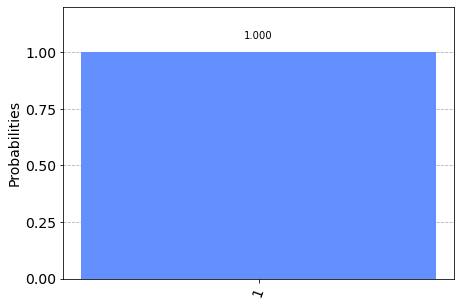

In [17]:
bkend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, bkend, shots=1000)
counts = job.result().get_counts(qc)
plot_histogram(counts)

In [18]:
def oracle_DJZM(num, type, val):
    oracle_circuit = QuantumCircuit(num + 1, num)
    if type == 'C' and val == '0' :
        return oracle_circuit
    if type == 'C' and val == '1' :
        oracle_circuit.x(num)
    if type == 'B' and val == 'S' :
        oracle_circuit.cx(num-1, num)
    if type == 'B' and val == 'D' :
        oracle_circuit.cx(num-1, num)
        oracle_circuit.x(num)
    
    return oracle_circuit

In [19]:
# many to one mapping f(x) -> {0, 1}^n -> {0, 1},  the LSB is the outcome.  
num = 3
qc = QuantumCircuit(num+1, num)
qc.h(range(num))
qc.x(num)
qc.h(num)
qc.barrier()

# Call oracle by uncommenting one of four lines of code  
qc = qc + oracle_DJZM(num, 'C', '0') # for f(x) = 0, constant 
#qc = qc + oracle_DJZM(num, 'C', '1') # for f(x) = 1, constant
#qc = qc + oracle_DJZM(num, 'B', 'S') # for f(x) = x, balanced 
#qc = qc + oracle_DJZM(num, 'B', 'D') # for f(x) = not(x), balanced


qc.barrier()
qc.h(range(num))
qc.measure(range(num), range(num))
qc.draw()

┌───┐      ░  ░ ┌───┐┌─┐      
q_0: ┤ H ├──────░──░─┤ H ├┤M├──────
     ├───┤      ░  ░ ├───┤└╥┘┌─┐   
q_1: ┤ H ├──────░──░─┤ H ├─╫─┤M├───
     ├───┤      ░  ░ ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├──────░──░─┤ H ├─╫──╫─┤M├
     ├───┤┌───┐ ░  ░ └───┘ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░──░───────╫──╫──╫─
     └───┘└───┘ ░  ░       ║  ║  ║ 
c: 3/══════════════════════╩══╩══╩═
                           0  1  2

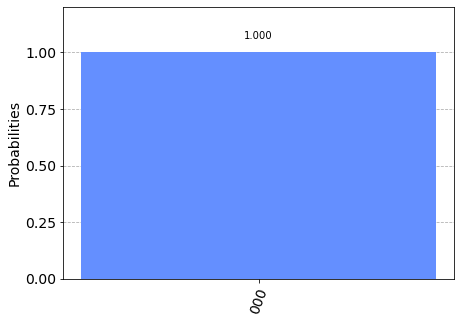

In [20]:
bkend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, bkend, shots=100)
counts = job.result().get_counts(qc)
plot_histogram(counts)

In [13]:
# end of program